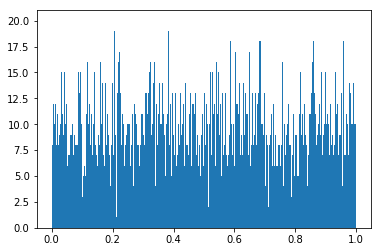

In [1]:
#just run the mcmc two param stuff
#write it out on paper,check for errors


#2
import numpy as np
import matplotlib.pyplot as plt

rand = np.zeros(10000)
for i in range(10000):
    rand[i] = np.random.uniform(0.0, 1.0)

nums,bins,patches = plt.hist(rand, bins = 1000)
plt.show()
    

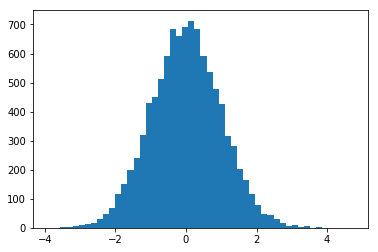

In [2]:
#3
data = np.random.normal(loc = 0.0, scale = 1.0, size= 10000) #loc = mean, scale = 1 standard deviation
plt.hist(data, bins = 50)
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, sigma, mu):
    p = 1/(sigma*np.sqrt(2.*np.pi)) * (np.e**((-(x-mu)**2)/(2*sigma**2)))
    return p

def draw(mean, variance):
    draw = np.random.normal(loc = float(mean), scale = variance**2.)
    return draw

0.7007


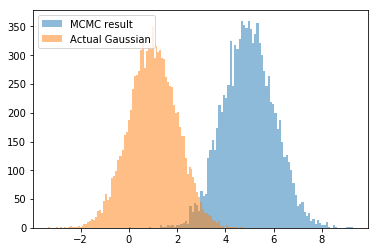

In [2]:
#MCMC 1
"""way i understand it, you have a prior set of data, and using
the algorithm you are trying out random values of parameter x
and based on the Hasting ratio, you are accepting the value or not
to produce data that models the normal distribution of prior data"""
def mcmc(sigma, mu, N):
    count=0
    sigma=sigma #constant in gaussian() method eq.
    mu=mu #constant in gaussian() method eq.
    N=N
    i=0
    x=np.zeros(N) #thus setting rand starting value = 0
    while i < N-1:
        y = x[i] + draw(0, sigma)#not sigma squared, since function will square it again
        H = gaussian(y, sigma, mu) / gaussian(x[i], sigma, mu)
        alpha = np.random.uniform(0., 1.)
        if H >= alpha:
            x[i+1] = y
            count+=1
        else:
            x[i+1] = x[i]
        i+=1
    print(count/N)
    return x

x = mcmc(1,5, 10000)    
plt.hist(x, 100, alpha = .5, label = "MCMC result")
#plt.show()

#x = mcmc(.1, 0, 10000 )
#plt.hist(x, 2000, alpha = .5, label = ".1 sigma", color = 'green')
#plt.show()

#x = mcmc(.01, 0, 10000)
#plt.hist(x, 2000)
#plt.show()

#x = mcmc(10, 0, 10000)
#plt.hist(x, 2000)
#plt.show()

actual = np.random.normal(1, 1, 10000)
plt.hist(actual, 100, label= "Actual Gaussian", alpha = .5 )

plt.legend()
plt.show()

In [5]:
count = 0
for i in x:
    if i == 0:
        count+=1
count

1

In [6]:
#MCMC assignment 2

#in assignment 1, what is pi(x|theta)?
"""we are using the x [] produced from MCMC and the function p(d=x[]) 
to try to infer parameters mu, sigma (or now, we are reversing what we 
did in previous assignment)"""
#what is "posterior distribution function?
#"probability distr of an unknown quantity after taking into account
#some prior known quantities, in this case known quantity is data d?
#p(d|μ, σ) = the likelihood of d={x} given mu and sigma values

#what is auto correlation length?
#correlation between 2 values of SAME variable at times xi and xi+k, instead of correlation between 2 different 
#variables. Used to find non-randomness in data if autocorrelation coeffient above certain value?

#what is marginalized posterior distribution funtions?
#marginalization is if we have 2 variables X,Y, and we know P(X=x, Y=y) at all values of x and y, then summing
#all probabable values where X=x occurs with y = y1, y2, y3...yn is equal to just P(X=x), in essence
#P(X=x) = sum for all values of y of P(X=x, Y=y)

#what is target distribution?

def gaussian(x, sigma, mu):
    #p = 1/(sigma*np.sqrt(2.*np.pi)) * (np.e**((-(x-mu)**2)/(2*sigma**2)))
    p = np.exp(-1*((x-mu)**2.)/(2*sigma**2)/(np.sqrt(2*np.pi)*sigma))
    return p

def draw(mean, variance):
    draw = np.random.normal(loc = float(mean), scale = variance**2.)
    #draw = np.random.uniform(0, 1.)
    return draw

0.797


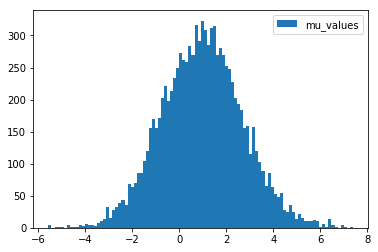

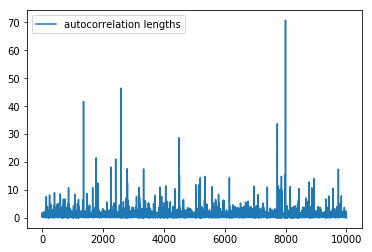

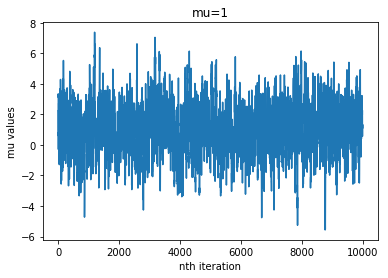

In [7]:
#MCMC assignment 2
def mcmc_unknown_mu(sigma, x, N):
    count = 0
    sigma = sigma #constant in this case
    x = x #prior array of data
    N = N
    i = 0
    d = np.zeros(N) #store mu values, thus setting starting mu = 0
    d[0] = np.pi
    autocorr = np.zeros(N)
    while i < N-1:
        y = d[i] + draw(0, 1)#not sigma squared, since function will square it again
        H = gaussian(x[i], sigma, y) / gaussian(x[i], sigma, d[i])
        autocorr[i] = H
        alpha = np.random.uniform(0., 1.)
        if H >= alpha:
            d[i+1] = y
            count+=1
        else:
            d[i+1] = d[i]
        i += 1
    print(count/float(N))
    return d, autocorr

#running mcmc
mu_data, autocorr_arr = mcmc_unknown_mu(1, x, 10000)

#plot histogram of mu values
plt.hist(mu_data, 100, label = "mu_values")
plt.legend()
plt.show()

#plot autocorrelation length
t = range(len(autocorr_arr))
plt.plot(t, autocorr_arr, label = "autocorrelation lengths")
plt.legend()
#plt.xlim( (900, 1000))
#plt.ylim( (0, 2))
#plt.legend()
plt.show()

#plt.plot(t, autocorr_arr, label = "autocorrelation lengths")
#plt.xlim( (9900, 10000))
#plt.ylim( (0, 2))
#plt.legend()
#plt.show()

plt.plot(range(len(mu_data)), mu_data)
plt.title("mu=1")
plt.xlabel("nth iteration")
plt.ylabel("mu values")
plt.legend()
plt.show()


0.993


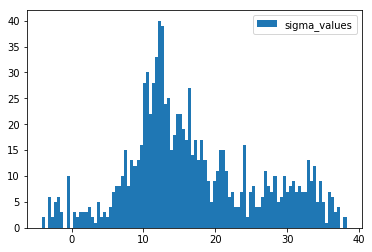

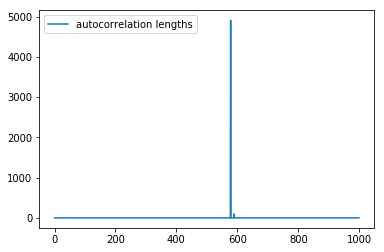

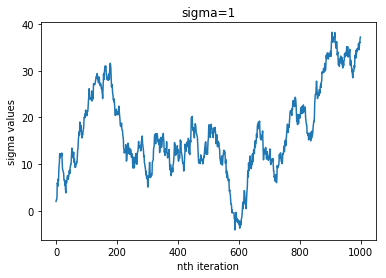

In [8]:
#MCMC assignment 2
def mcmc_unknown_sigma(mu, x, N):
    count = 0
    mu = mu #constant in this case
    x = x #prior array of data
    N = N
    i = 0
    d = np.zeros(N) #store mu values, thus setting starting mu = 0
    d[0] = 2
    autocorr = np.zeros(N)
    while i < N-1:
        y = d[i] + draw(0,1)#not sigma squared, since function will square it again
        H = gaussian(x[i], y, mu) / gaussian(x[i], d[i], mu)
        autocorr[i] = H
        alpha = np.random.uniform(0., 1.)
        if H >= alpha:
            d[i+1] = y
            count+=1
        else:
            d[i+1] = d[i]
        i += 1
    print(count/float(N))
    return d, autocorr

#running mcmc
sigma_data, autocorr_arr = mcmc_unknown_sigma(1, x, 1000)

#plot histogram of mu values
plt.hist(sigma_data, 100, label = "sigma_values")
plt.legend()
plt.show()

#plot autocorrelation length
t = range(len(autocorr_arr))
plt.plot(t, autocorr_arr, label = "autocorrelation lengths")
plt.legend()
#plt.xlim( (900, 1000))
#plt.ylim( (0, 2))
#plt.legend()
plt.show()

#plt.plot(t, autocorr_arr, label = "autocorrelation lengths")
#plt.xlim( (9900, 10000))
#plt.ylim( (0, 2))
#plt.legend()
#plt.show()

plt.plot(range(len(sigma_data)), sigma_data)
plt.title("sigma=1")
plt.xlabel("nth iteration")
plt.ylabel("sigma values")
plt.legend()
plt.show()


In [3]:
def gaussian(x, sigma, mu):
    p = 1/(sigma*np.sqrt(2.*np.pi)) * (np.e**((-(x-mu)**2)/(2*sigma**2)))
    return p

def draw(mean, variance):
    draw = np.random.normal(loc = float(mean), scale = variance**2.)
    #draw = np.random.uniform(-1., 1.)
    return draw

def log_likelihood(x, sigma, mu, n):
    log_p =0
    for i in range(len(x)):
        log_p += -np.log(sigma) - ((x[i]-mu)**2) / (2*sigma**2)
    log_p = -n*np.log(2*np.pi)/2. + log_p
    return log_p
    

In [ ]:
#MCMC assignment 2
#.2 too small, .3 too large, .1 works? 50% at .095
def mcmc_two_param(x, N):
    count = 0
    x = x #known prior array of data
    N = N
    i = 0
    mu_arr = np.zeros(N)#store mu values, thus setting starting mu = 0
    mu_arr[0] = 5
    sigma_arr = np.zeros(N)#store sigma values, thus setting starting sigma = 0 unless changed below this line
    sigma_arr[0] = 1
    autocorr = np.zeros(N)
    while i < N-1:
        print(i, "th iteration")
        y_mu = mu_arr[i] + draw(0, .1)#here, sigma is unknown so try proposal distribution of sigma = 1
        y_sigma = sigma_arr[i] + draw(0, .1)
        #calculate likelihood
        a = log_likelihood(x, y_sigma, y_mu, N) 
        b = log_likelihood(x, sigma_arr[i], mu_arr[i], N)#what the hell did i change????
        exponent = a-b
        if exponent >= 0:
            sigma_arr[i+1] = y_sigma
            mu_arr[i+1] = y_mu
            count+=1
        else:
            H = np.exp(exponent)
            autocorr[i] = H
            alpha = np.random.uniform(0., 1.)
            if H >= alpha:
                sigma_arr[i+1] = y_sigma
                mu_arr[i+1] = y_mu
                count+=1
            else:
                sigma_arr[i+1] = sigma_arr[i]
                mu_arr[i+1] = mu_arr[i]
        i+=1    
    print(count/float(N))
    return sigma_arr, mu_arr, autocorr

#plot scatterplot mu and sigma
sigma, mu, autocorr = mcmc_two_param(x, 10000)
plt.scatter(sigma, mu, marker = '.')
plt.ylabel("mu")
plt.xlabel("sigma")
plt.show()

#plot autocorrelation length
t = range(len(autocorr))
plt.plot(t, autocorr, label = "autocorrelation lengths", alpha = .5)
plt.legend()
#plt.xlim( (900, 1000))
#plt.ylim( (0, 2))
#plt.legend()
plt.show()

plt.hist(sigma, 100)
plt.title("sigma = 1")
plt.show()
plt.hist(mu, 100)
plt.title("mu = 5")
plt.show()

plt.plot(range(len(mu)), mu)
plt.title("mu=5")
plt.xlabel("nth iteration")
plt.ylabel("mu values")
plt.legend()
plt.show()

plt.plot(range(len(sigma)), sigma)
plt.title("sigma = 1")
plt.xlabel("nth iteration")
plt.ylabel("sigma values")
plt.legend()
plt.show()
## higher number of prior known samples = higher accuracy, also the accuracy of the 2D plot varies SIGNIFICANTLY
#for every new run, sometimes it's almost spot on, other times no clear pattern

#for jump size with sigma unknown, 

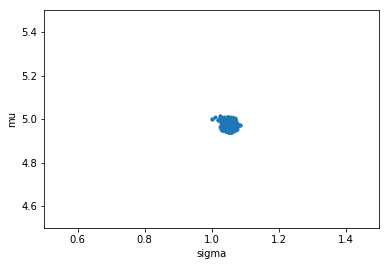

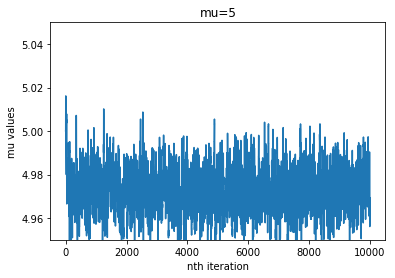

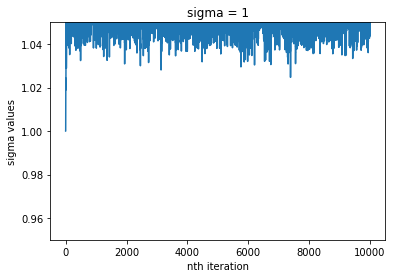

In [5]:
plt.scatter(sigma, mu, marker = '.')
plt.ylabel("mu")
plt.xlabel("sigma")
plt.xlim([.5, 1.5])
plt.ylim([4.5, 5.5])
plt.show()

plt.plot(range(len(mu)), mu)
plt.title("mu=5")
plt.xlabel("nth iteration")
plt.ylabel("mu values")
plt.legend()
plt.ylim([4.95, 5.05])
#plt.xlim([2000, 2350])
plt.show()

plt.plot(range(len(sigma)), sigma)
plt.title("sigma = 1")
plt.xlabel("nth iteration")
plt.ylabel("sigma values")
plt.ylim([.950, 1.05])
#plt.xlim([2000, 2350])
#plt.xlim([10, 210])
plt.legend()
plt.show()

0.087


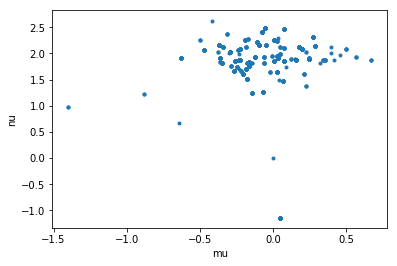

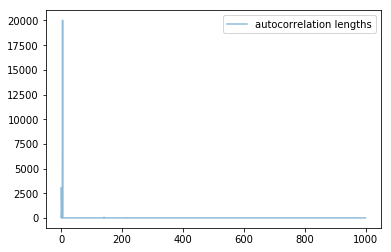

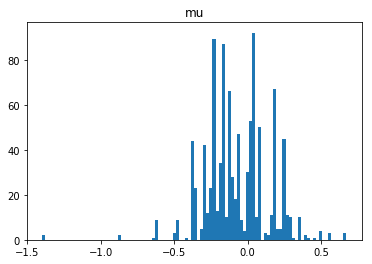

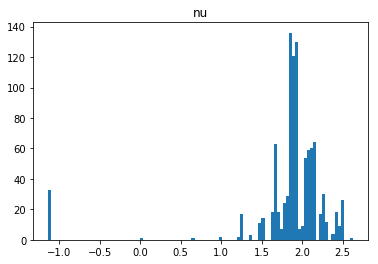

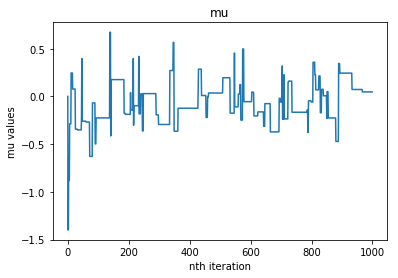

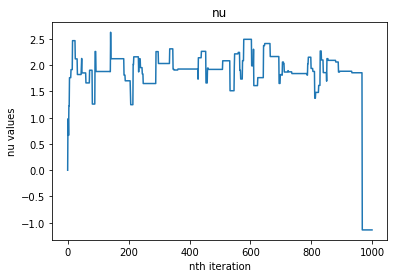

In [31]:
#MCMC assignment 3
def target(mu, nu):
    p = 16/(np.pi * 3) * (np.e**(-1*mu**2-(9+4*mu**2+8*nu)**2) + .5*np.e**(-8*mu**2 -8*(nu-2)**2)) 
    return p
def draw(mean, variance):
    draw = np.random.normal(loc = float(mean), scale = variance**2.)
    return draw
def log_likelihood(x, sigma, mu, n):
    log_p =0
    for i in range(len(x)):
        log_p += -np.log(sigma) - ((x[i]-mu)**2) / (2*sigma**2)
    log_p = -n*np.log(2*np.pi)/2. + log_p
    return log_p
def reg_mcmc(N):
    count = 0
    mu = np.zeros(N)
    nu = np.zeros(N)
    autocorrelation = np.zeros(N)
    i = 0
    N = N
    while i < N-1:
        y_mu = mu[i] + draw(0, 1)
        y_nu = nu[i] + draw(0, 1)
        H = target(y_mu, y_nu) / target(mu[i], nu[i])
        autocorrelation[i] = H
        alpha = np.random.uniform(0., 1.)
        if H >= alpha:
            mu[i+1] = y_mu
            nu[i+1] = y_nu
            count += 1
        else:
            mu[i+1] = mu[i]
            nu[i+1] = nu[i]
        i += 1
    print(count/float(N))
    return mu, nu, autocorrelation

#plot scatterplot mu and sigma

mu, nu, autocorrelation = reg_mcmc(1000)
plt.scatter(mu, nu, marker = '.')
plt.ylabel("nu")
plt.xlabel("mu")
plt.show()

#plot autocorrelation length
t = range(len(autocorrelation))
plt.plot(t, autocorrelation, label = "autocorrelation lengths", alpha = .5)
plt.legend()
#plt.xlim( (900, 1000))
#plt.ylim( (0, 2))
#plt.legend()
plt.show()

plt.hist(mu, 100)
plt.title("mu")
plt.show()
plt.hist(nu, 100)
plt.title("nu")
plt.show()

plt.plot(range(len(mu)), mu)
plt.title("mu")
plt.xlabel("nth iteration")
plt.ylabel("mu values")
plt.legend()
plt.show()

plt.plot(range(len(nu)), nu)
plt.title("nu")
plt.xlabel("nth iteration")
plt.ylabel("nu values")
plt.legend()
plt.show()

0.422


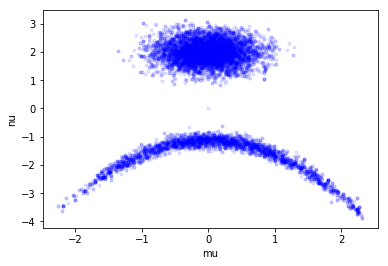

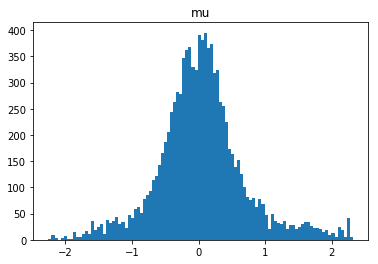

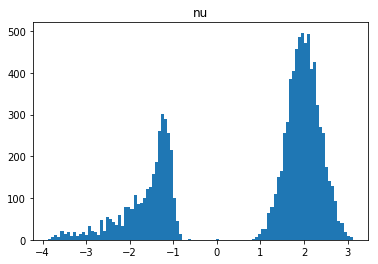

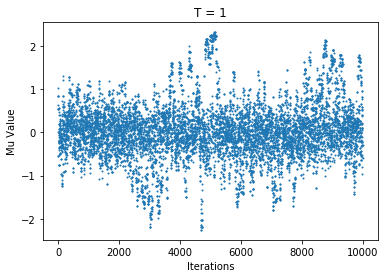

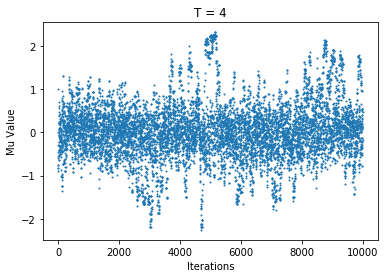

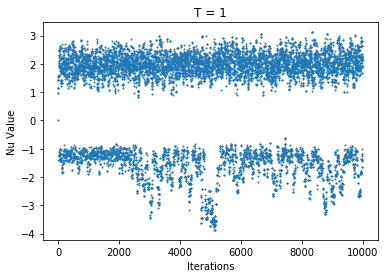

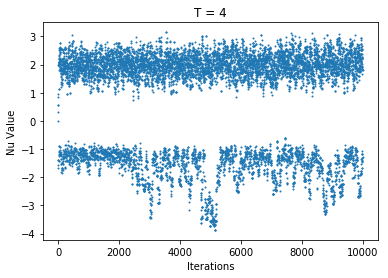

In [12]:
#MCMC assignment 3 multiple chains
def target(mu, nu):
    p = 16/(np.pi * 3) * (np.e**(-1*mu**2-(9+4*mu**2+8*nu)**2) + .5*np.e**(-8*mu**2 -8*(nu-2)**2)) 
    return p
def draw(mean, variance):
    draw = np.random.normal(loc = float(mean), scale = variance**2.)
    return draw
def usual_mcmc(mu_i, nu_i, T):
    y_mu = mu_i + draw(0, .5)
    y_nu = nu_i + draw(0, .5)
    H = target(y_mu, y_nu)**(1/T) / target(mu_i, nu_i)**(1/T)
    alpha = np.random.uniform(0., 1.)
    if H>= alpha:
        return y_mu, y_nu
    else:
        return mu_i, nu_i
def chain_swap_probability(iter_index, T, mu_arr, nu_arr, swap_count):
    swap_ct = swap_count
    for i in range(len(T)):
        if i != len(T)-1:
            H_swap = (target(mu_arr[i,iter_index+1], nu_arr[i,iter_index+1])**(1/T[i])) * (target(mu_arr[i+1,iter_index], nu_arr[i+1,iter_index])**(1/T[i+1])) / ((target(mu_arr[i,iter_index], nu_arr[i,iter_index])**(1/T[i])) *(target(mu_arr[i+1,iter_index+1], nu_arr[i+1,iter_index+1])**(1/T[i+1]))) 
            alpha = np.random.uniform(0, 1.)
            if H_swap >= alpha:
                if i == 0: #for swap count
                    swap_ct+=1
                tmp1 = mu_arr[i+1,iter_index+1]
                tmp2 = nu_arr[i+1,iter_index+1]
                mu_arr[i+1, iter_index+1] = mu_arr[i, iter_index+1]
                nu_arr[i+1, iter_index+1] = nu_arr[i, iter_index+1]
                mu_arr[i, iter_index+1] = tmp1
                nu_arr[i, iter_index+1] = tmp2
    return swap_ct
    #no need to return
def ptmcmc(N, T):
    """Input number of iterations and temperature array."""
    T = T
    N = N
    swap_count = 0
    #initialize storage arrays for mu and nu - 2d arrays with T rows, N columns
    mu_arr = np.zeros([len(T), N])
    mu_arr[0,0] = 0
    mu_arr[1,0] = 1
    mu_arr[2,0] = 0
    nu_arr = np.zeros([len(T), N])
    nu_arr[0,0] = 0
    nu_arr[1,0] = 2
    nu_arr[2,0] = -2
    i = 0
    while i < N-1:
        for x in range(len(T)):
            new_mu, new_nu = usual_mcmc(mu_arr[x,i], nu_arr[x,i], T[x])
            mu_arr[x, i+1] = new_mu
            nu_arr[x, i+1] = new_nu
        if i%2 == 0:    #without this, scatterplot is all weird
            swap_count = chain_swap_probability(i, T, mu_arr, nu_arr, swap_count)
        i+=1
    print(swap_count/float(N))
    return mu_arr[0], nu_arr[0], mu_arr[1], nu_arr[1]
    #return the first row of each mu_arr, nu_arr bc we discard all other T != 1

#run ptmcmc
T = [1, 2, 4]#first T must always be 1
N = 10000
mu_data, nu_data, mu_2, nu_2 = ptmcmc(N, T)
plt.scatter(mu_data, nu_data, marker = '.', color = "blue", alpha = .1)
plt.ylabel("nu")
plt.xlabel("mu")
plt.show()

plt.hist(mu_data, 100)
plt.title("mu")
plt.show()
plt.hist(nu_data, 100)
plt.title("nu")
plt.show()

plt.scatter(range(N), mu_data, s = 1)
plt.xlabel("Iterations")
#plt.xlim([0,50])
plt.ylabel("Mu Value")
plt.title("T = 1")
plt.show()
plt.scatter(range(N), mu_2, s = 1)
plt.xlabel("Iterations")
#plt.xlim([0,50])
plt.ylabel("Mu Value")
plt.title("T = 4")
plt.show()

plt.scatter(range(N), nu_data, s = 1)
plt.xlabel("Iterations")
#plt.xlim([2000,3000])
plt.ylabel("Nu Value")
plt.title("T = 1")
plt.show()
plt.scatter(range(N), nu_2, s = 1)
plt.xlabel("Iterations")
#plt.xlim([2000,3000])
plt.ylabel("Nu Value")
plt.title("T = 4")
plt.show()
